# 5-2 two classes - A - test model

In [1]:
%load_ext autoreload
%autoreload 2

from import_file import*


In [2]:
path = Path.cwd() / "processed_data" / "df_bi_A.pkl"
df = pd.read_pickle(path)

In [3]:
# Specifiying features and labels
X = df['statement']
y = df['label']

In [4]:
# Specifying train and test split with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

10268 2568
10268 2568


## Defining Functions

In [5]:
stemmer = PorterStemmer()

def tokenizer(input_string):
    words = re.sub(r"[^A-Za-z0-9-]", " ", input_string) # Replace everything except a-zA-Z0-9- by a space
    words = words.lower() # Lower casing
    words = words.split() # Split a string into a list  
    words = [stemmer.stem(word) for word in words] #Stemming
    return words

In [6]:
# Stopwords list set to english
stopwords_list = stopwords.words('english')

In [7]:
model_dict = {}
model_accuracy = []

In [8]:
def print_results():
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    model_accuracy.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [9]:
def display_confusion_matrix(cm, classes, title='Confusion Matrix'):
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    size = (10, 8)
    fig, ax = plt.subplots(figsize = size)
    sns.heatmap(df_cm, annot=True, cmap="Blues", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    plt.title(title)

## Logistic Regression

### Using `pipe1`

In [10]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_LR_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[0]='pipe 1 Logistic Regression'
print_results() 

Accuracy:  0.6070872274143302
              precision    recall  f1-score   support

        Fake       0.57      0.45      0.50      1134
       Truth       0.63      0.73      0.68      1434

    accuracy                           0.61      2568
   macro avg       0.60      0.59      0.59      2568
weighted avg       0.60      0.61      0.60      2568

[[ 507  627]
 [ 382 1052]]


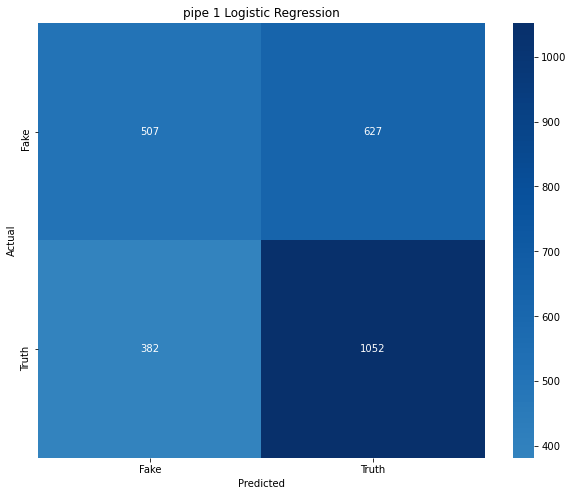

In [11]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Logistic Regression')

### Using `pipe2`

In [12]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_LR_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[1]='pipe 2 Logistic Regression'
print_results() 

Accuracy:  0.5907320872274143
              precision    recall  f1-score   support

        Fake       0.54      0.50      0.52      1134
       Truth       0.63      0.66      0.64      1434

    accuracy                           0.59      2568
   macro avg       0.58      0.58      0.58      2568
weighted avg       0.59      0.59      0.59      2568

[[564 570]
 [481 953]]


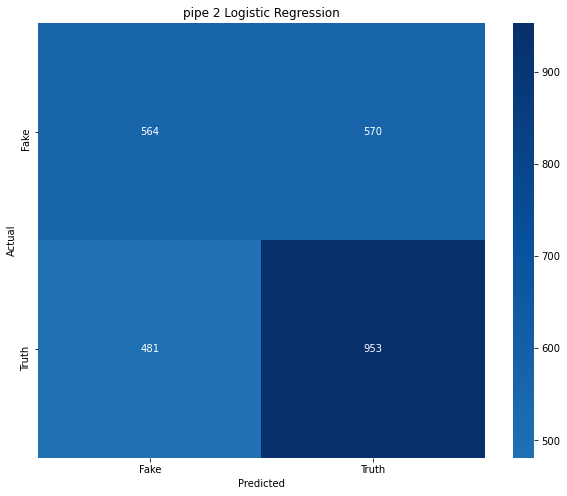

In [13]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Logistic Regression')

## Multinomial Naive Bayes Classifier

### Using `pipe1`

In [14]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_MNB_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[2]='pipe 1 Multinomial Naive Bayes'
print_results() 

Accuracy:  0.6031931464174455
              precision    recall  f1-score   support

        Fake       0.60      0.31      0.41      1134
       Truth       0.60      0.83      0.70      1434

    accuracy                           0.60      2568
   macro avg       0.60      0.57      0.56      2568
weighted avg       0.60      0.60      0.57      2568

[[ 352  782]
 [ 237 1197]]


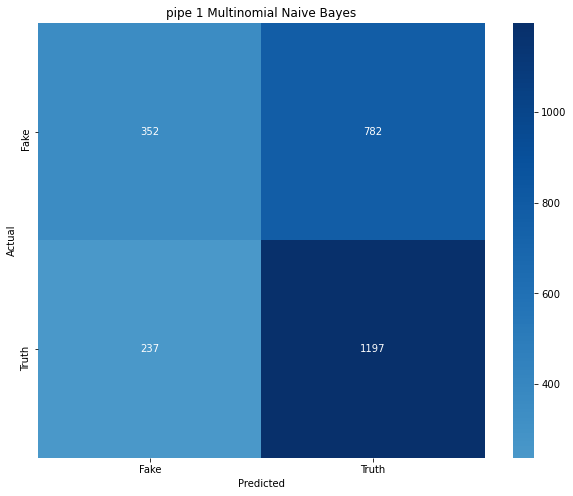

In [15]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Multinomial Naive Bayes')

### Using `pipe2`

In [16]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_MNB_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[3]='pipe 2 Multinomial Naive Bayes'
print_results() 

Accuracy:  0.6016355140186916
              precision    recall  f1-score   support

        Fake       0.56      0.48      0.51      1134
       Truth       0.63      0.70      0.66      1434

    accuracy                           0.60      2568
   macro avg       0.59      0.59      0.59      2568
weighted avg       0.60      0.60      0.60      2568

[[ 543  591]
 [ 432 1002]]


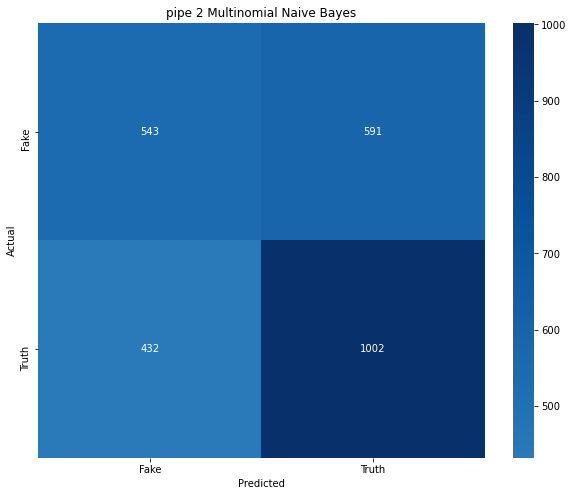

In [17]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Multinomial Naive Bayes')

## Support Vector Machine

### Using `pipe1`

In [18]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_SVM_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[4]='pipe 1 Support Vector Machine'
print_results() 

Accuracy:  0.5876168224299065
              precision    recall  f1-score   support

        Fake       0.54      0.44      0.48      1134
       Truth       0.61      0.71      0.66      1434

    accuracy                           0.59      2568
   macro avg       0.58      0.57      0.57      2568
weighted avg       0.58      0.59      0.58      2568

[[ 497  637]
 [ 422 1012]]


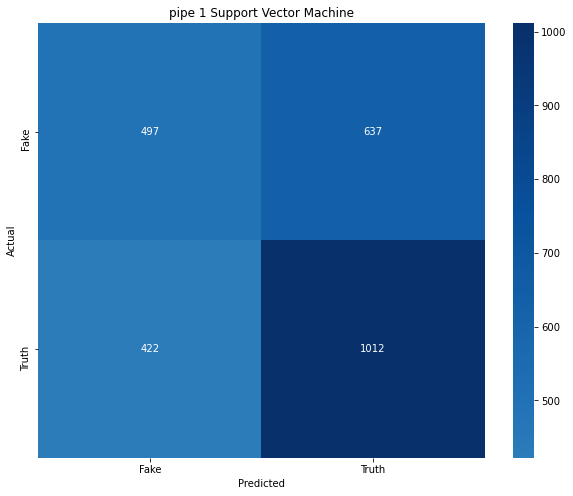

In [19]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Support Vector Machine')

### Using `pipe2`

In [20]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_SVM_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[5]='pipe 2 Support Vector Machine'
print_results() 

Accuracy:  0.5794392523364486
              precision    recall  f1-score   support

        Fake       0.52      0.51      0.52      1134
       Truth       0.62      0.64      0.63      1434

    accuracy                           0.58      2568
   macro avg       0.57      0.57      0.57      2568
weighted avg       0.58      0.58      0.58      2568

[[576 558]
 [522 912]]


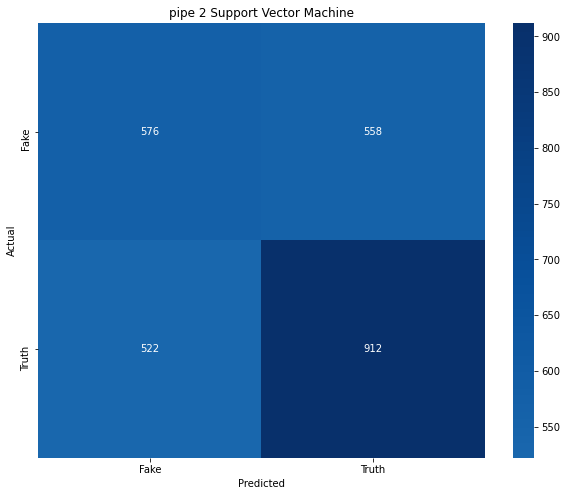

In [21]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Support Vector Machine')

## Decision Tree Classifier

### Using `pipe1`

In [22]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_DTC_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[6]='pipe 1 Decision Tree Classifier'
print_results() 

Accuracy:  0.5545171339563862
              precision    recall  f1-score   support

        Fake       0.50      0.48      0.49      1134
       Truth       0.60      0.62      0.61      1434

    accuracy                           0.55      2568
   macro avg       0.55      0.55      0.55      2568
weighted avg       0.55      0.55      0.55      2568

[[541 593]
 [551 883]]


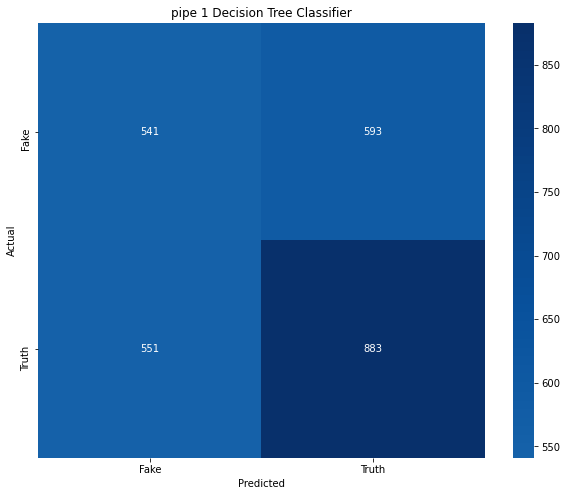

In [23]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Decision Tree Classifier')

### Using `pipe2`

In [24]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_DTC_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[7]='pipe 2 Decision Tree Classifier'
print_results() 

Accuracy:  0.573208722741433
              precision    recall  f1-score   support

        Fake       0.52      0.47      0.49      1134
       Truth       0.61      0.66      0.63      1434

    accuracy                           0.57      2568
   macro avg       0.56      0.56      0.56      2568
weighted avg       0.57      0.57      0.57      2568

[[532 602]
 [494 940]]


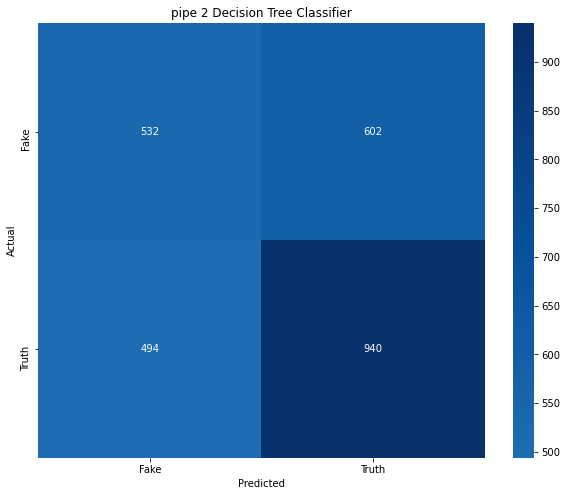

In [25]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Decision Tree Classifier')

## Random Forest Classifier

### Using `pipe1`

In [26]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_RFC_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[8]='pipe 1 Random Forest Classifier'
print_results() 

Accuracy:  0.610202492211838
              precision    recall  f1-score   support

        Fake       0.58      0.44      0.50      1134
       Truth       0.63      0.74      0.68      1434

    accuracy                           0.61      2568
   macro avg       0.60      0.59      0.59      2568
weighted avg       0.60      0.61      0.60      2568

[[ 502  632]
 [ 369 1065]]


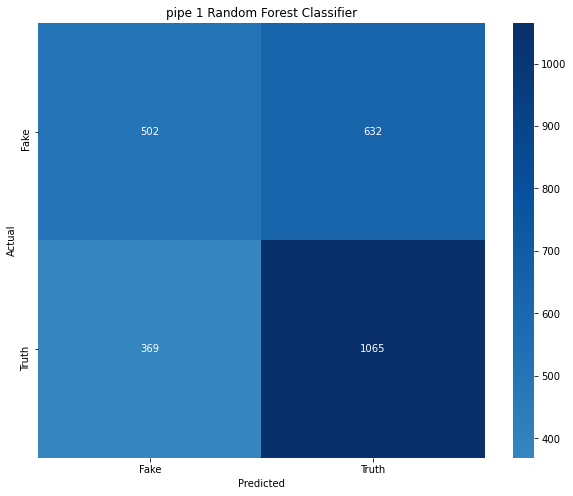

In [27]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Random Forest Classifier')

### Using `pipe2`

In [28]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_RFC_bi_A.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[9]='pipe 2 Random Forest Classifier'
print_results() 

Accuracy:  0.6230529595015576
              precision    recall  f1-score   support

        Fake       0.59      0.48      0.53      1134
       Truth       0.64      0.74      0.69      1434

    accuracy                           0.62      2568
   macro avg       0.62      0.61      0.61      2568
weighted avg       0.62      0.62      0.62      2568

[[ 543  591]
 [ 377 1057]]


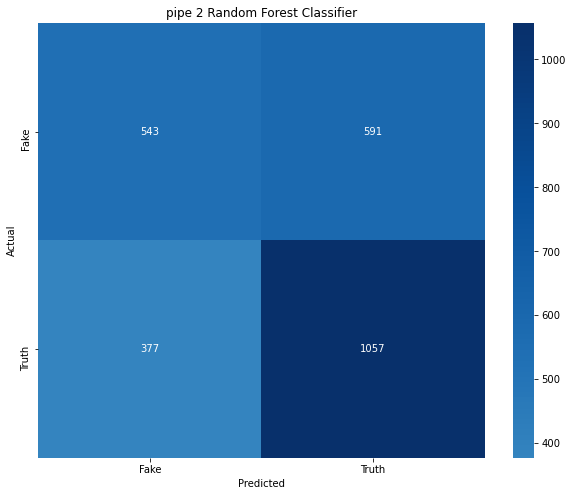

In [29]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Random Forest Classifier')

## Accuracy of the models

In [30]:
for i in range(len(model_accuracy)):
    print("{} accuracy: {}".format(model_dict[i], model_accuracy[i]))

pipe 1 Logistic Regression accuracy: 0.6070872274143302
pipe 2 Logistic Regression accuracy: 0.5907320872274143
pipe 1 Multinomial Naive Bayes accuracy: 0.6031931464174455
pipe 2 Multinomial Naive Bayes accuracy: 0.6016355140186916
pipe 1 Support Vector Machine accuracy: 0.5876168224299065
pipe 2 Support Vector Machine accuracy: 0.5794392523364486
pipe 1 Decision Tree Classifier accuracy: 0.5545171339563862
pipe 2 Decision Tree Classifier accuracy: 0.573208722741433
pipe 1 Random Forest Classifier accuracy: 0.610202492211838
pipe 2 Random Forest Classifier accuracy: 0.6230529595015576
